# Load and Analyze Time Series Data

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>You're required to perform initial data exploration for the 'orders.csv' file. Start by importing the necessary libraries. After which, load the data into a DataFrame. Ensure that the 'date' column serves as the index and is parsed as a date. Subsequently, view the last five entries to validate your data import. Lastly, retrieve a statistical summary of the loaded data to gauge its distribution and characteristics.</p></div>

In [1]:
# Import the required Pandas library.

# Import the Pandas library
import pandas as pd

In [2]:
# Load the data from 'orders.csv' into a DataFrame, setting 'date' as the index and parsing it appropriately.

# Load data from 'orders.csv' with 'date' as index and parsed as date
df = pd.read_csv("orders.csv", parse_dates=True, index_col = ['date'])

In [3]:
# Display the last five records to ensure correct data loading.

# Preview the last five entries in the DataFrame
df.tail()

,orders,marketing_investment,discount_rate
date,,,
2022-12-27,27450.6,302.904844,0.070321
2022-12-28,29131.6,303.511201,0.073613
2022-12-29,19133.3,300.464154,0.006089
2022-12-30,18347.7,297.994770,0.005196
2022-12-31,12451.0,300.681191,0.009529


In [4]:
# Obtain and display a statistical summary of the DataFrame to inspect its data distribution.

# Retrieve and print a statistical summary of the DataFrame
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             orders  marketing_investment  discount_rate
count   1826.000000           1826.000000    1826.000000
mean   16102.564239            190.488288       0.011012
std     7048.729220             52.782529       0.015189
min     4925.700000             76.739679       0.002250
25%    10769.175000            149.182568       0.004157
50%    14673.650000            186.819914       0.006233
75%    20026.800000            229.652842       0.010576
max    93604.900000            352.655988       0.126732


# Decompose and Visualize the 'orders' Time Series Using STL Method

<p>Your objective is to break down the 'orders' time series data into its underlying components using the STL method. After the decomposition, visualize the original data, trend, seasonal, and residual components for a comprehensive view of the 'orders' time series data.</p>

In [5]:
# Start by importing the necessary Matplotlib library.

# Import the required Matplotlib library for plotting
import matplotlib.pyplot as plt

Text(0, 0.5, 'Orders')

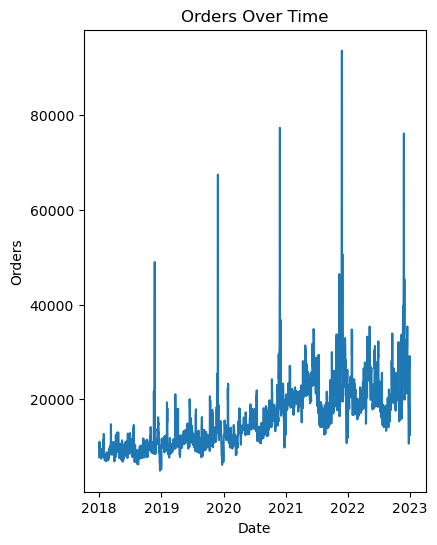

In [6]:
# Initialize a figure to host the three subplots with a suitable size for clear visualization. 
# Create the first subplot to visualize 'orders' over time.

# Initialize a figure for the subplots
plt.figure(figsize=(15, 6))
 
# Create a subplot to visualize 'orders' over time
plt.subplot(1, 3, 1)
plt.plot(df.index, df['orders'])
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')

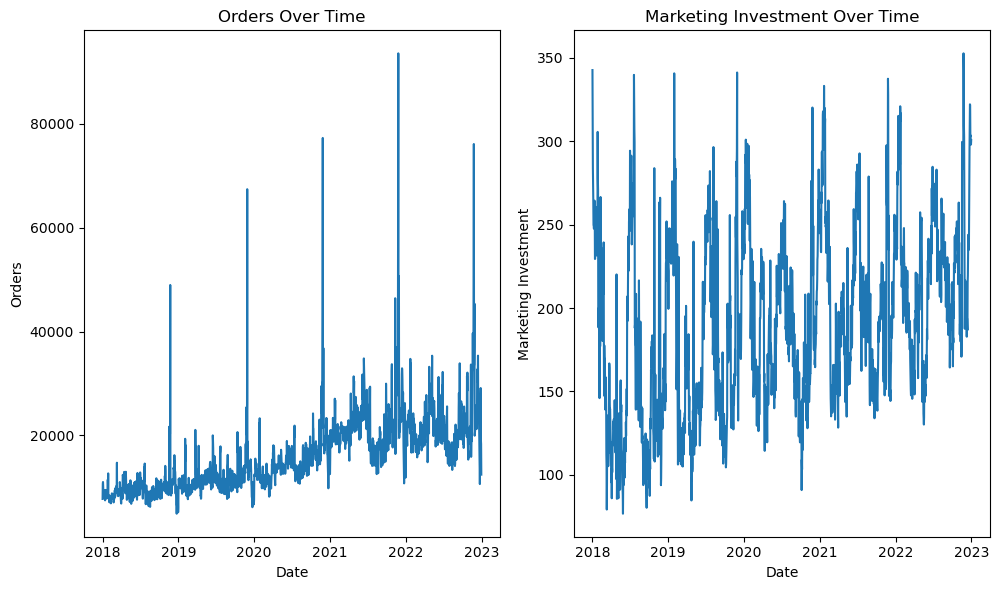

In [7]:
# Plot the 'marketing_investment' against time in the second subplot. Adjust the layout to ensure no overlaps and display the plotted charts.

# Initialize a figure for the subplots
plt.figure(figsize=(15, 6))
 
# Create a subplot to visualize 'orders' over time
plt.subplot(1, 3, 1)
plt.plot(df.index, df['orders'])
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
 
# Add a subplot to visualize 'marketing_investment' over time
plt.subplot(1, 3, 2)
plt.plot(df.index, df['marketing_investment'])
plt.title('Marketing Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Marketing Investment')
 
# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

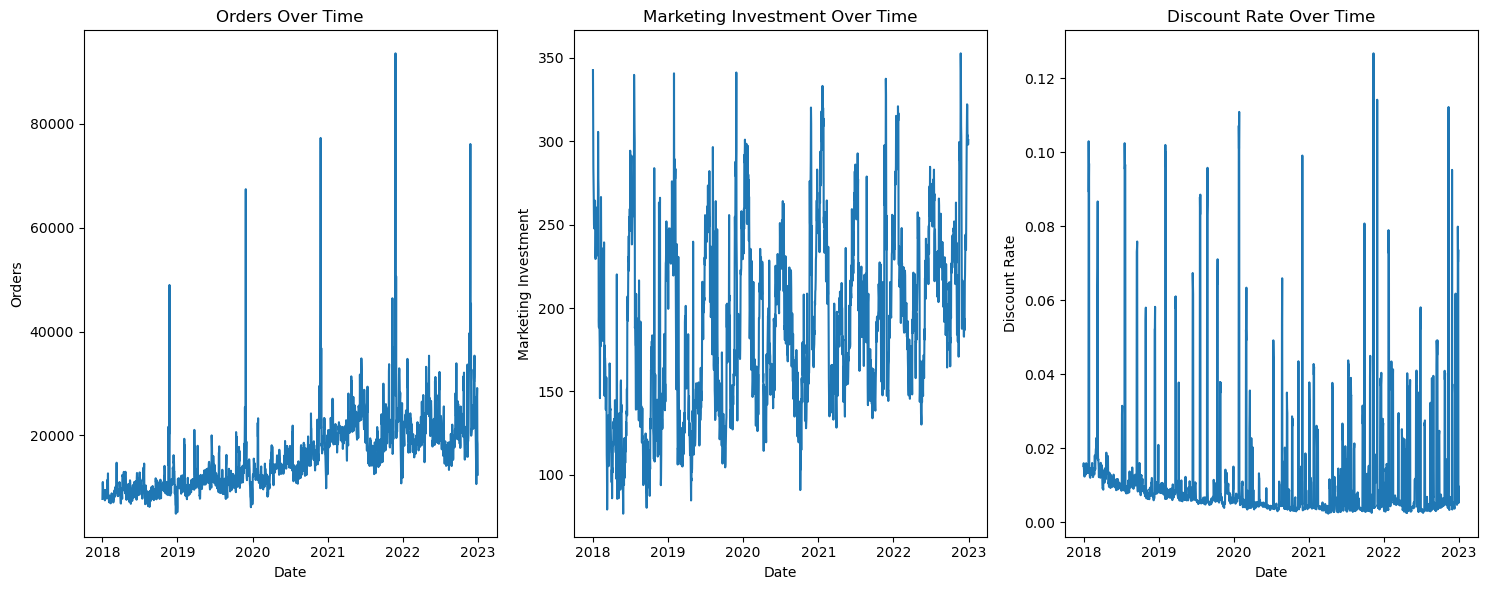

In [8]:
# Lastly, visualize the 'discount_rate' over time in the third subplot.

# Initialize a figure for the subplots
plt.figure(figsize=(15, 6))
 
# Create a subplot to visualize 'orders' over time
plt.subplot(1, 3, 1)
plt.plot(df.index, df['orders'])
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
 
# Add a subplot to visualize 'marketing_investment' over time
plt.subplot(1, 3, 2)
plt.plot(df.index, df['marketing_investment'])
plt.title('Marketing Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Marketing Investment')
 
# Add a subplot to visualize 'discount_rate' over time
plt.subplot(1, 3, 3)
plt.plot(df.index, df['discount_rate'])
plt.title('Discount Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Discount Rate')
 
# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

# Incorporate Trend and Seasonal Components into the DataFrame

<p>Integrate the previously obtained trend and seasonal components from the 'orders' time series decomposition into the primary DataFrame. After this integration, ensure that the DataFrame is clean by removing any rows that contain NaN values.</p>

In [9]:
# Import the required library for STL decomposition.

# Required Libraries
from statsmodels.tsa.seasonal import STL

In [10]:
# Decompose the 'orders' time series into its trend, seasonal, and residual components. Assuming daily data, set the seasonality period to 365 days.

# Decompose the 'orders' time series using STL
stl = STL(df['orders'], period=365)  # Assuming daily data and 365 days for seasonality
result = stl.fit()

In [11]:
# Extract the respective components from the STL result.

# Extract the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

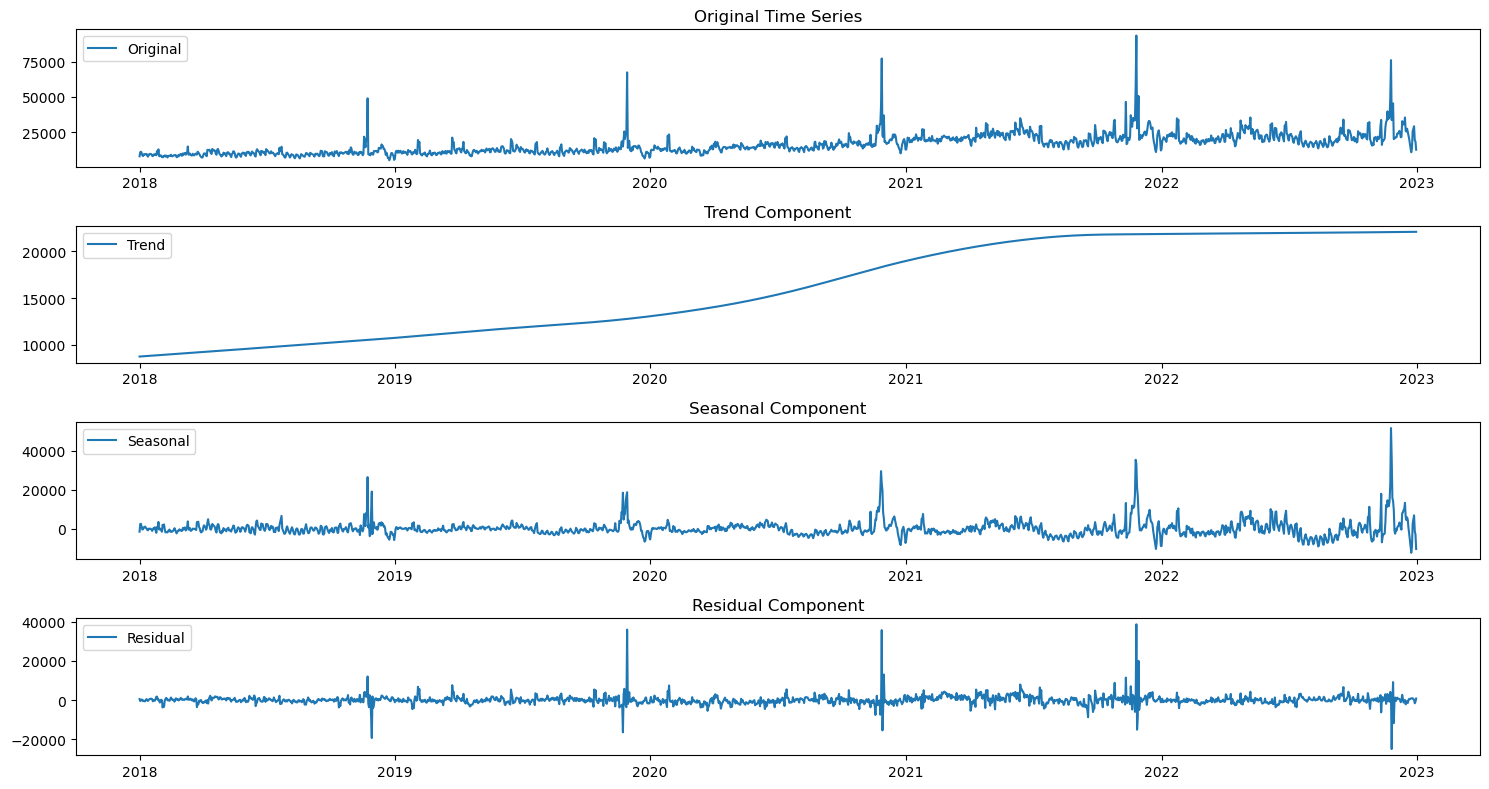

In [12]:
# Plot and visualize the original time series data alongside the decomposed components.

# Plotting
plt.figure(figsize=(15, 8))
 
# Original Data
plt.subplot(4, 1, 1)
plt.plot(df.index, df['orders'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
 
# Trend Component
plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
 
# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
 
# Residual Component
plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
 
plt.tight_layout()
plt.show()

# Preprocess Data for LSTM and Train a Sequential Model

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Prepare the provided dataset for LSTM processing. You need to:</p><ul><li><p>Scale the dataset using MinMax scaling.</p></li><li><p>Segment the data into feature (X) and target (y) variables.</p></li><li><p>Ensure the data is shaped to fit into LSTM layers.</p></li><li><p>Split the dataset into training and test sets. The test set should consist of the last 31 records.</p></li><li><p>Construct an LSTM model:</p><ul><li><p>Use 50 neurons in the LSTM layer with the activation function set to 'relu'.</p></li><li><p>The dense layer should contain one neuron.</p></li><li><p>Compile the model using the 'adam' optimizer and the mean absolute error ('mae') as the loss metric.</p></li></ul></li><li><p>Train the model for 50 epochs.</p></li></ul></div>

In [13]:
# Add the trend and seasonal components to the DataFrame.

# Add trend and seasonal components to the dataframe
df['trend'] = result.trend
df['seasonal'] = result.seasonal


In [14]:
# Clean the DataFrame by eliminating any rows that might have NaN values, ensuring a seamless dataset.

# We'll need to remove any remaining NaN values after decomposition
df.dropna(inplace=True)

In [15]:
# Inspect the first 5 rows to check the outcome.

# Preview the DataFrame
df.head()

,orders,marketing_investment,discount_rate,trend,seasonal
date,,,,,
2018-01-01,7766.7,342.634293,0.015126,8755.194669,-1522.105256
2018-01-02,10686.5,304.345270,0.015907,8760.481296,2420.759849
2018-01-03,11032.3,284.074519,0.014387,8765.768729,2521.026909
2018-01-04,10034.9,275.267608,0.013852,8771.056972,1003.363837
2018-01-05,8452.1,264.312049,0.012928,8776.346029,-435.974023


# Compute Performance Metrics for LSTM Model Predictions on Time Series Data

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Utilizing the trained LSTM model, carry out predictions on the test dataset. Subsequently, you should:</p><ul><li><p>Predict the last 31 days of orders using the LSTM model.</p></li><li><p>Reverse the scaling process on the predicted values to acquire the original orders scale.</p></li><li><p>Collate the predicted orders to the actual last 31 days of orders.</p></li><li><p>Measure the performance of the LSTM model by computing both the Mean Absolute Error (MAE) and the Mean Absolute Percentage Error (MAPE).</p></li></ul></div>

In [16]:
# Import all the necessary libraries and tools for data processing and LSTM modeling.

# Required Libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [17]:
# Utilize the MinMaxScaler to scale the dataset for neural network modeling.

# Preprocess data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [18]:
# Segment the data into feature set (X) and target variable (y).

# Isolate X and Y
X = scaled_data[:, 1:]
y = scaled_data[:, 0]   

In [19]:
# Alter the shape of the feature set to be compatible with LSTM layers.

# Reshape X for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [20]:
# Split the dataset into training and testing sets, ensuring you separate the last 31 records for testing.

# Split data into training and test sets
X_train, X_test = X[:-31], X[-31:]
y_train, y_test = y[:-31], y[-31:]

In [21]:
# Design and compile an LSTM model architecture, specifying the layers, activation functions, and loss optimization strategy.

# LSTM Model architecture
model = Sequential()
model.add(LSTM(50, 
               activation='relu', 
               input_shape=(X_train.shape[1], 
                            X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [22]:
# Train the prepared LSTM model using the segmented training data.

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50


2024-02-05 12:28:15.265986: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


57/57 [==============================] - 0s 694us/step - loss: 0.0745
Epoch 2/50
57/57 [==============================] - 0s 588us/step - loss: 0.0308
Epoch 3/50
57/57 [==============================] - 0s 578us/step - loss: 0.0246
Epoch 4/50
57/57 [==============================] - 0s 591us/step - loss: 0.0229
Epoch 5/50
57/57 [==============================] - 0s 605us/step - loss: 0.0214
Epoch 6/50
57/57 [==============================] - 0s 579us/step - loss: 0.0202
Epoch 7/50
57/57 [==============================] - 0s 592us/step - loss: 0.0189
Epoch 8/50
57/57 [==============================] - 0s 604us/step - loss: 0.0177
Epoch 9/50
57/57 [==============================] - 0s 583us/step - loss: 0.0165
Epoch 10/50
57/57 [==============================] - 0s 589us/step - loss: 0.0158
Epoch 11/50
57/57 [==============================] - 0s 594us/step - loss: 0.0155
Epoch 12/50
57/57 [==============================] - 0s 589us/step - loss: 0.0152
Epoch 13/50
57/57 [=================

# Design, Train, and Evaluate an Advanced LSTM Model with Dropout Layers on Time Series Data

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Your objective is to develop an advanced LSTM model with precise parameters and layer configurations to enhance the prediction accuracy of a time series dataset. This model should incorporate two LSTM layers with dropout regularization. Ensure you follow the detailed steps below:</p><ul><li><p><strong>Define an Advanced LSTM Model</strong>:</p><ul><li><p>First LSTM layer:</p><ul><li><p>Units: 100</p></li><li><p>Activation function: ReLU</p></li><li><p>Return sequences: True</p></li><li><p>Dropout: 0.2 (20% dropout rate)</p></li></ul></li><li><p>Second LSTM layer:</p><ul><li><p>Units: 50</p></li><li><p>Activation function: ReLU</p></li><li><p>Dropout: 0.2 (20% dropout rate)</p></li></ul></li><li><p>Final Dense layer with one output unit.</p></li></ul></li><li><p><strong>Compile and Train the Advanced LSTM Model</strong>:</p><ul><li><p>Optimizer: Adam</p></li><li><p>Loss function: Mean Absolute Error (MAE)</p></li><li><p>Epochs: 50</p></li></ul></li><li><p><strong>Evaluate and Report the Advanced Model's Performance</strong>:</p><ul><li><p>Compute and compare the Mean Absolute Error (MAE) and the Mean Absolute Percentage Error (MAPE) of the advanced model predictions against the actual values of the last 31 days.</p></li></ul></li></ul></div>

In [23]:
# Import the required metric utilities:

# Importing the metric utilities
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [24]:
# Predict on the test data using LSTM model:

# Predicting the orders for the last 31 days
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


In [25]:
# Revert the scaling process for predicted data:

# Setting up a zero matrix to facilitate the reverse scaling process
num_features = df.shape[1]
zero_matrix = np.zeros((y_pred.shape[0], num_features - 1))
 
# Merging the predictions with the zero matrix
inverse_input = np.hstack((y_pred, zero_matrix))
 
# Reverting the scaling to obtain predicted values in the original order magnitude
predicted_orders = scaler.inverse_transform(inverse_input)[:, 0]

In [26]:
# Retrieve the actual last 31 days of orders for comparison:

# Retrieving the actual orders for the last 31 days
actual_orders = df['orders'].values[-31:]

In [27]:
# Calculate the performance metrics:

# Calculating Mean Absolute Error
MAE = mean_absolute_error(actual_orders, predicted_orders)
 
# Calculating Mean Absolute Percentage Error
MAPE = mean_absolute_percentage_error(actual_orders, predicted_orders)

In [28]:
# Output the derived esults:

# Printing the derived performance metrics
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Mean Absolute Percentage Error (MAPE): {MAPE}%")

Mean Absolute Error (MAE): 1237.1537547269172
Mean Absolute Percentage Error (MAPE): 0.05507738709709705%


In [29]:
# Import the necessary layer:

# Importing the Dropout layer from Keras
from tensorflow.keras.layers import Dropout

In [30]:
# Define the advanced LSTM model:

# Setting up an advanced LSTM architecture
advanced_model = Sequential()
 
# First LSTM layer along with Dropout
advanced_model.add(LSTM(100, 
                        activation='relu', 
                        return_sequences=True,
                        input_shape=(X_train.shape[1], X_train.shape[2])))
advanced_model.add(Dropout(0.2))
 
# Second LSTM layer followed by Dropout
advanced_model.add(LSTM(50, activation='relu'))
advanced_model.add(Dropout(0.2))
 
# Final Dense layer
advanced_model.add(Dense(1))

In [31]:
# Compile and train the model:

# Compiling the model
advanced_model.compile(optimizer='adam', loss='mae')
 
# Model training
advanced_model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
57/57 [==============================] - 1s 1ms/step - loss: 0.0644
Epoch 2/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 4/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 5/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 6/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 7/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 8/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 9/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 10/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 11/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 12/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 13/50
57/57 [==============================

In [32]:
# Predict with the advanced model:

# Making predictions with the advanced model
y_pred_advanced = advanced_model.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [33]:
# Revert scaling for predicted data:

# Constructing an inverse input matrix with predictions and zero columns
inverse_input_advanced = np.hstack((y_pred_advanced, zero_matrix))
 
# Undoing the scaling to get predicted values in the original order magnitude
predicted_orders_advanced = scaler.inverse_transform(inverse_input_advanced)[:, 0]

In [34]:
# Calculate the performance metrics for the advanced model:

# Calculating the Mean Absolute Error for the advanced model
MAE_advanced = mean_absolute_error(actual_orders, predicted_orders_advanced)
 
# Calculating the Mean Absolute Percentage Error for the advanced model
MAPE_advanced = mean_absolute_percentage_error(actual_orders, predicted_orders_advanced)
 
# Displaying the computed metrics
print(f"Advanced Model - Mean Absolute Error (MAE): {MAE_advanced}")
print(f"Advanced Model - Mean Absolute Percentage Error (MAPE): {MAPE_advanced}%")


Advanced Model - Mean Absolute Error (MAE): 1242.1598839732917
Advanced Model - Mean Absolute Percentage Error (MAPE): 0.05082466016233073%


# Implement and Evaluate an Advanced LSTM Model using Rolling Forecast Evaluation

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>You are required to implement and assess an advanced LSTM model utilizing a rolling forecast approach for time series data. This method involves making successive forecasts and advancing the training window over the dataset. The forecasts should be performed for the next 30 days at every 15-day interval during 2022. This is to observe the model's capability to generalize over varying temporal subsets of data. Here are the specifics:</p><ul><li><p><strong>Create an Advanced LSTM Model</strong>:</p><ul><li><p>Define a function, <code><strong>create_advanced_lstm_model</strong></code>, which returns an LSTM model.</p></li><li><p>First LSTM layer:</p><ul><li><p>Units: 50</p></li><li><p>Activation function: ReLU</p></li><li><p>Return sequences: True</p></li></ul></li><li><p>Second LSTM layer:</p><ul><li><p>Units: 50</p></li><li><p>Activation function: ReLU</p></li></ul></li><li><p>First Dense layer:</p><ul><li><p>Units: 25</p></li><li><p>Activation function: ReLU</p></li></ul></li><li><p>Second Dense layer with one output unit.</p></li><li><p>Compilation:</p><ul><li><p>Optimizer: Adam</p></li><li><p>Loss function: Mean Absolute Error (MAE)</p></li></ul></li></ul></li><li><p><strong>Implement the Rolling Forecast Evaluation</strong>:</p><ul><li><p>Define a function, <code><strong>rolling_forecast_evaluation_advanced</strong></code>, with parameters:</p><ul><li><p>df: input dataframe.</p></li><li><p>start_date: beginning date for the rolling forecast.</p></li><li><p>forecast_length (default value of 30): duration of the forecast.</p></li><li><p>step (default value of 15): interval to slide the window.</p></li></ul></li><li><p>Within this function:</p><ul><li><p>Iterate over the dataset by advancing the training window.</p></li><li><p>For each window, scale the data using MinMaxScaler.</p></li><li><p>Split the data into training and test subsets.</p></li><li><p>Train the LSTM model on the training subset.</p></li><li><p>Generate predictions for the test subset.</p></li><li><p>Compute the MAE and MAPE for each forecast.</p></li><li><p>Return the MAEs and MAPEs for each forecast window.</p></li></ul></li></ul></li><li><p><strong>Evaluate the Model</strong>:</p><ul><li><p>Report the MAEs and MAPEs for each window and their averages.</p><p><br></p></li></ul></li></ul></div>

In [35]:
# Importing necessary libraries:

from datetime import timedelta

In [36]:
# Define the advanced LSTM model:

def create_advanced_lstm_model(input_shape):
    model = Sequential()
    # Adding the first LSTM layer with 50 units and ReLU activation.
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    
    # Adding the second LSTM layer with 50 units and ReLU activation.
    model.add(LSTM(50, activation='relu'))
    
    # Adding a dense layer with 25 units and ReLU activation.
    model.add(Dense(25, activation='relu'))
    
    # Adding the output dense layer with a single unit.
    model.add(Dense(1))
    
    # Compiling the LSTM model.
    model.compile(optimizer='adam', loss='mae')
    
    return model

In [37]:
# Implement the rolling forecast evaluation:

def rolling_forecast_evaluation_advanced(df, start_date, forecast_length=30, step=15):
    MAEs = []  # List to store Mean Absolute Errors.
    MAPEs = []  # List to store Mean Absolute Percentage Errors.
 
    current_date = pd.to_datetime(start_date)
    
    # Continue as long as the end date doesn't exceed the final date in the dataset.
    while current_date < df.index[-1] - timedelta(days=forecast_length):
        
        # Define training and test periods based on current_date.
        train_end = current_date
        test_start = train_end + timedelta(days=1)
        test_end = test_start + timedelta(days=forecast_length - 1)
 
        # Split data into training and test sets.
        train = df[:train_end]
        test = df[test_start:test_end]
 
        # Normalize train and test data.
        scaler = MinMaxScaler()
        train_scaled = scaler.fit_transform(train)
        test_scaled = scaler.transform(test)
 
        # Create train and test sets for X (features) and y (target).
        X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
        X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]
 
        # Adjust data shape for LSTM input.
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
 
        # Create and train the model.
        model = create_advanced_lstm_model((X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=50, verbose=0)
 
        # Forecast with the trained model.
        y_pred = model.predict(X_test)
        
        # Process the predictions for inverse scaling.
        inverse_input = np.hstack((y_pred, np.zeros((y_pred.shape[0], df.shape[1]-1))))
        predicted = scaler.inverse_transform(inverse_input)[:, 0]
        actual = test['orders'].values
 
        # Calculate error metrics.
        MAE = mean_absolute_error(actual, predicted)
        MAPE = mean_absolute_percentage_error(actual, predicted)
        
        # Append the errors to their respective lists.
        MAEs.append(MAE)
        MAPEs.append(MAPE)
 
        # Advance the current_date by the specified step.
        current_date += timedelta(days=step)
 
    return MAEs, MAPEs

In [38]:
# Use the function and evaluate the model:

# Set the start date for the rolling forecast evaluation.
start_date = '2022-01-01'
MAEs, MAPEs = rolling_forecast_evaluation_advanced(df, start_date)

1/1 [==============================] - 0s 92ms/step


In [39]:
# View the outcome of the cross-validation:

# Display the MAE and MAPE for each evaluation window and their averages.
print(f"Average MAE: {np.mean(MAEs)}")
print(f"Average MAPE: {np.mean(MAPEs)}%")

Average MAE: 1548.597003965261
Average MAPE: 0.06928386893364587%


# Hyperparameter Tuning for LSTM Model

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Conduct a hyperparameter tuning process to optimize the structure of an LSTM neural network designed to predict a target value based on 2022 data. Develop a function, <code><strong>create_tuned_model</strong></code>, that defines an LSTM model based on specific hyperparameters. This model consists of two LSTM layers followed by two Dense layers, with the ability to adjust hyperparameters like the number of neurons, the optimizer type, and the dropout rate. After defining the model structure, the model should be compiled using the specified optimizer and a loss function set to Mean Absolute Error (MAE). Return the compiled model.</p><p><strong>Function: create_tuned_model</strong></p><ul><li><p><strong>Layers &amp; Structure</strong>:</p><ol><li><p><strong>LSTM Layer</strong>:</p><ul><li><p>Number of neurons: <code><strong>neurons</strong></code>.</p></li><li><p>Activation function: <code><strong>ReLU</strong></code>.</p></li><li><p>Configuration: This layer is set to return sequences, making it suitable to feed into another LSTM layer.</p></li><li><p>Input Shape: Depends on the shape of the training data (specifically, <code><strong>X_train.shape[1]</strong></code> is the number of time steps and <code><strong>X_train.shape[2]</strong></code> is the number of features per time step).</p></li></ul></li><li><p><strong>LSTM Layer</strong>:</p><ul><li><p>Number of neurons: <code><strong>neurons</strong></code>.</p></li><li><p>Activation function: <code><strong>ReLU</strong></code>.</p></li></ul></li><li><p><strong>Dense Layer</strong>:</p><ul><li><p>Number of neurons: <code><strong>neurons//2</strong></code>.</p></li><li><p>Activation function: <code><strong>ReLU</strong></code>.</p></li></ul></li><li><p><strong>Dense Layer</strong> (Output Layer):</p><ul><li><p>Number of neurons: 1. This implies that it's a regression task, predicting a single continuous value.</p></li><li><p>Activation function: None specified, meaning it will be a linear activation.</p></li></ul></li></ol></li><li><p><strong>Compilation</strong>:</p><ul><li><p><strong>Optimizer</strong>: Specified by the <code><strong>optimizer</strong></code> parameter.</p></li><li><p><strong>Loss Function</strong>: Mean Absolute Error (MAE).</p></li></ul></li><li><p><strong>Parameters</strong>:</p><ul><li><p><strong>neurons</strong> (int, default: 50): Number of neurons for the LSTM layers. Represents the dimensionality of the output space.</p></li><li><p><strong>optimizer</strong> (class, default: Adam): The optimizer class to be used during model compilation.</p></li><li><p><strong>dropout_rate</strong> (float, default: 0.0): Although the parameter exists, it's not applied in the layers in the provided code. Ideally, it should define the fraction of the inputs to drop, typically added to prevent overfitting.</p></li></ul></li><li><p><strong>Returns</strong>:</p><ul><li><p>A compiled LSTM model constructed based on the provided hyperparameters.</p></li></ul></li></ul><p><strong>Parameters to be tuned</strong>:</p><ul><li><p><strong>neurons</strong>: List of integers representing the number of neurons to be tested ( [30, 50]).</p></li><li><p><strong>optimizer</strong>: List of optimizer classes to be tested ([SGD, Adam]).</p></li><li><p><strong>dropout_rate</strong>: List of dropout rates to be tested ([0.0, 0.2]).</p><p><br></p></li></ul></div>

In [40]:
# Import the optimizers to be tested

from tensorflow.keras.optimizers import SGD, Adam

In [41]:
# Create the LSTM Model Function based on provided hyperparameters:

def create_tuned_model(neurons=50, optimizer=Adam, dropout_rate=0.0):
    # Initialize a sequential model
    model = Sequential()
    
    # Add the first LSTM layer with the 'relu' activation function
    model.add(LSTM(neurons, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Add the second LSTM layer with the 'relu' activation function
    model.add(LSTM(neurons, activation='relu'))
    
    # Add a Dense layer which has half the number of neurons compared to the LSTM layers and uses the 'relu' activation function
    model.add(Dense(neurons//2, activation='relu'))
    
    # Add an output Dense layer to produce a single output value
    model.add(Dense(1))
    
    # Compile the model with the provided optimizer and Mean Absolute Error as the loss function
    model.compile(optimizer=optimizer(), loss='mae')
    return model

In [42]:
# Define Hyperparameters for Tuning and combine the hyperparameters to test all possible combinations:

# Define hyperparameters to be tested
neurons = [30, 50]
optimizer_classes = [SGD, Adam]
dropout_rate = [0.0, 0.2]
 
# Generate all combinations of hyperparameters
all_params = [(n, o, d) for n in neurons for o in optimizer_classes for d in dropout_rate]

In [43]:
# Set up variables to track the best hyperparameters and their respective scores:

# Initialize variables to track best hyperparameters and scores
best_mae_params = None
best_mae_score = float('inf')
best_mape_params = None
best_mape_score = float('inf')
results = []

In [44]:
# Define the initial date for the time series and calculate the number of required splits:

# Define starting date and calculate number of time series splits
start_date = pd.Timestamp('2022-01-01')
num_splits = (365 - 30) // 15

In [45]:
# Start by structuring the loop to go through all hyperparameter combinations:

# Loop over all hyperparameter combinations
for params in all_params:
    total_mae = 0.0
    total_mape = 0.0
    n, o, d = params
    print(n, 0, d)

30 0 0.0
30 0 0.2
30 0 0.0
30 0 0.2
50 0 0.0
50 0 0.2
50 0 0.0
50 0 0.2


In [46]:
# Perform cross-validation, data preprocessing, model training, prediction, and performance evaluation.

# Loop over all hyperparameter combinations
for params in all_params:
    total_mae = 0.0
    total_mape = 0.0
    n, o, d = params
    
    # Sliding window cross-validation over 2022 data
    for i in range(0, 365 - 30, 15): 
        split_date = start_date + pd.Timedelta(days=i)
        train = df[df.index < split_date]
        test = df[(df.index >= split_date) & (df.index < split_date + pd.Timedelta(days=30))]
        
        # Preprocessing, scaling
        scaler = MinMaxScaler()
        train_scaled = scaler.fit_transform(train)
        test_scaled = scaler.transform(test)
        
        X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
        X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]
        
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
        
        # Create and fit the model
        model = create_tuned_model(neurons=n, optimizer=o, dropout_rate=d)
        model.fit(X_train, y_train, epochs=50, verbose=0)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        inverse_input = np.hstack((y_pred, np.zeros((y_pred.shape[0], df.shape[1] - 1))))
        y_pred_rescaled = scaler.inverse_transform(inverse_input)[:, 0]
        
        # Convert predictions and test targets back to the original scale
        inverse_input_test = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))))
        y_test_rescaled = scaler.inverse_transform(inverse_input_test)[:, 0]
        
        # Compute the evaluation metrics.
        mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
        mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
 
        # adding the MAPE and MAE for each fold
        total_mae += mae
        total_mape += mape
 
    # Computing the Average MAE and MAPE
    avg_mae = total_mae / num_splits
    avg_mape = total_mape / num_splits
 
    # Storing the results
    results.append({'params': params,
                    'avg_mae': avg_mae,
                    'avg_mape': avg_mape
                   })
 
    if avg_mae < best_mae_score:
        best_mae_score = avg_mae
        best_mae_params = params
    
    if avg_mape < best_mape_score:
        best_mape_score = avg_mape
        best_mape_params = params

1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 290ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 332ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 315ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


In [47]:
# Display the best hyperparameters based on evaluation metrics:

# Print the best MAE and MAPE scores with their respective hyperparameters
print(f"Best MAE: {best_mae_score}")
print(f"Best MAPE: {best_mape_score}")
print(f"Best Hyperparameters for MAE - Neurons: {best_mae_params[0]}, Optimizer: {best_mae_params[1].__name__}, Dropout Rate: {best_mae_params[2]}")

Best MAE: 1500.068371973579
Best MAPE: 0.06622386084863913
Best Hyperparameters for MAE - Neurons: 50, Optimizer: Adam, Dropout Rate: 0.2
